# BART RIDERSHIP in the past twelve years

### Project Brief

Project outline: 

Target audience: Bart Board of Directors, City of San Francisco, SF Downtown Merchants Association

- Research question: With the growth in rideshare options, Covid-19 shelter-in-place mandates, and hybrid work from home options for work, where is Bart Ridership, specifically for SF Downtown Financial District, today?
    - How can this help inform City Planning and overall direction of this commercial area?
    - What are some opportunities to increase use? 
- Thorough exploratory data analysis
    - Overall trend in ridership in the past 12 years (rides by year). Visualization and hard figures. 
    - Show the drop in ridership during Covid shelter inplace mandate. 2019 - 2023 trajectory, month by month
    - Identify stations whose relative recovery does not match others. (compared to others): Percentage riders 2023 vs 2019 by station. Mean and Std. Are there any station outliers? (Q: Do this on the month or year)
    - SF Downtown stations analysis: Embarcadero, New Montgomery, Powell, and Civic Center
        - Distribution. Avg weekday rides to and from stations (2019 vs. 2023). Visualize how different the weekly distribution is.
        - Speak to weekday vs weekend use.
- Visualizations to support your findings
- Conclusions, Recommendations, and Future Work
    - Comment on where use is heading.
    - Future work: analyses whether rideshare data reflect these trends. Is it truly that people are commuting less or are they taking alternative forms of transportation. As the Bart and City, what can they to bring riders to downtown? 

How do I deel with a large data set? 12 of them?
Github

In [ ]:
The outline of your project should consider:
A clear research question
A target audience
Thorough exploratory data analysis
Visualizations to support your findings
Conclusions, Recommendations, and Future Work

In [1]:
import pandas as pd
import numpy as np
import random
import datetime

#### DOCS

In [6]:
bart = pd.read_csv('date-hour-soo-dest-2011.csv')

In [9]:
bart2022 = pd.read_csv('date-hour-soo-dest-2022.csv')

In [16]:
#Features

#Datetime

bart2022['Date'] = pd.to_datetime(bart2022['Date'], format = '%Y-%m-%d')
bart2022['Month'] = bart2022['Date'].dt.month
# sample['Year'] = sample['Date'].dt.year
bart2022['Day'] = bart2022['Date'].dt.dayofweek
bart2022 = bart2022.reset_index()
bart2022

,level_0,index,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Day
0,0,0,2022-01-01,0,12TH,12TH,1,1,5
1,1,1,2022-01-01,0,12TH,16TH,1,1,5
2,2,2,2022-01-01,0,12TH,24TH,2,1,5
3,3,3,2022-01-01,0,12TH,ASHB,1,1,5
4,4,4,2022-01-01,0,12TH,MONT,1,1,5
...,...,...,...,...,...,...,...,...,...
8245365,8245365,8245365,2022-12-31,23,WOAK,MCAR,1,12,5
8245366,8245366,8245366,2022-12-31,23,WOAK,MLBR,1,12,5
8245367,8245367,8245367,2022-12-31,23,WOAK,MONT,2,12,5
8245368,8245368,8245368,2022-12-31,23,WOAK,POWL,9,12,5


In [27]:
# SF_stations = ['EM','MT','PL','CC','16','24','GP','BP','CD','CM','SS','SB','SO','MB']
SF_stations = ['EMBR','MONT','POWL','CIVC','16TH','24TH','GLEN','BALB','DALY','COLM','SSAN','SBRN','SFIA','MLBR']
def SF(x):
    if x in SF_stations:
        return 1
    else:
        return 0
    
SF('24TH')

1

In [28]:
bart2022['Origin_SF'] = bart2022['Origin Station'].apply(SF)
bart2022['Destination_SF'] = bart2022['Destination Station'].apply(SF)
bart2022['Direction'] = (bart2022['Origin_SF']) - bart2022['Destination_SF']

In [29]:
bart2022

,level_0,index,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Day,Origin_SF,Destination_SF,Direction
0,0,0,2022-01-01,0,12TH,12TH,1,1,5,0,0,0
1,1,1,2022-01-01,0,12TH,16TH,1,1,5,0,1,-1
2,2,2,2022-01-01,0,12TH,24TH,2,1,5,0,1,-1
3,3,3,2022-01-01,0,12TH,ASHB,1,1,5,0,0,0
4,4,4,2022-01-01,0,12TH,MONT,1,1,5,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
8245365,8245365,8245365,2022-12-31,23,WOAK,MCAR,1,12,5,0,0,0
8245366,8245366,8245366,2022-12-31,23,WOAK,MLBR,1,12,5,0,1,-1
8245367,8245367,8245367,2022-12-31,23,WOAK,MONT,2,12,5,0,1,-1
8245368,8245368,8245368,2022-12-31,23,WOAK,POWL,9,12,5,0,1,-1


In [32]:
print(str(bart2022['Direction'].sum()) + ' more trips leaving SF than entering SF over the course of 2022.')
bart2022['Direction'].sum()

53190 more trips leaving SF than entering SF over the course of 2022.


53190

In [41]:
bart2022[(bart2022['Hour'] >= 0) & (bart2022['Hour'] <=12)]['Direction'].sum()
commute = bart2022[(bart2022['Hour'] >= 0) & (bart2022['Hour'] <=12)].groupby(['Day'])['Direction'].sum(
    ).reset_index().rename(columns={'Direction':'Morning Activity'})
commute['Afternoon Activity'] = bart2022[(bart2022['Hour'] > 12) & (bart2022['Hour'] <24)].groupby(['Day'])['Direction'].sum(
    )
print('Negative values reflect East Bay to SF directionality. Positive values show SF to East Bay directionality.')
commute

Negative values reflect East Bay to SF directionality. Positive values show SF to East Bay directionality.


,Day,Morning Activity,Afternoon Activity
0,0,-33278,38250
1,1,-35007,42513
2,2,-34799,42771
3,3,-32649,41416
4,4,-30460,33878
5,5,-10829,19063
6,6,-465,12786


<Axes: >

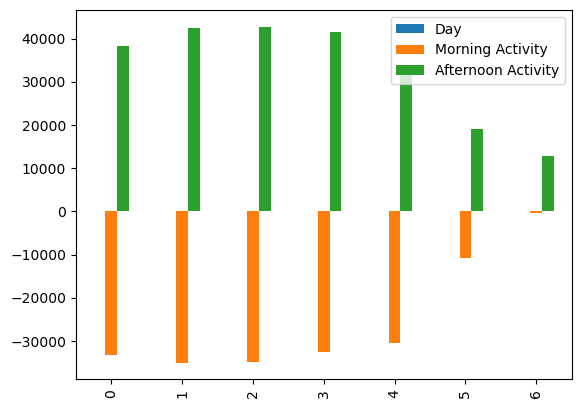

In [43]:
commute.plot.bar()

In [38]:
bart2022[(bart2022['Hour'] > 12) & (bart2022['Hour'] <24)].groupby(['Day'])['Direction'].sum(
    )#.reset_index()

Day
0    38250
1    42513
2    42771
3    41416
4    33878
5    19063
6    12786
Name: Direction, dtype: int64

<Axes: xlabel='Month'>

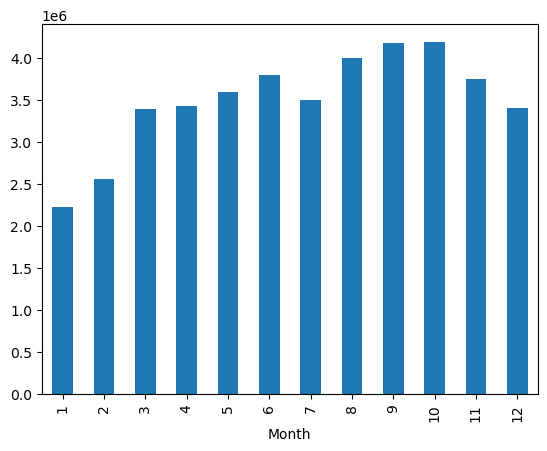

In [17]:
bart2022.groupby('Month')['Trip Count'].sum().plot.bar()

<Axes: xlabel='Day'>

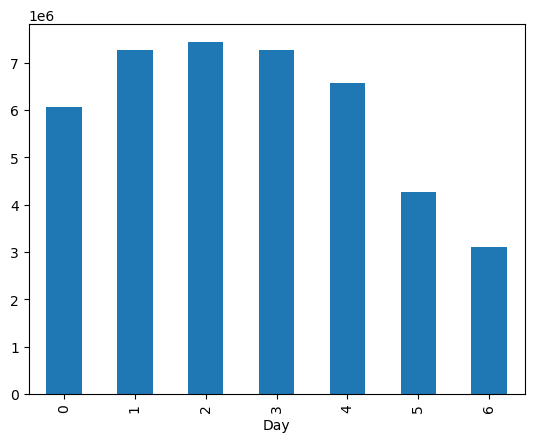

In [18]:
bart2022.groupby('Day')['Trip Count'].sum().plot.bar()

<Axes: xlabel='Origin Station'>

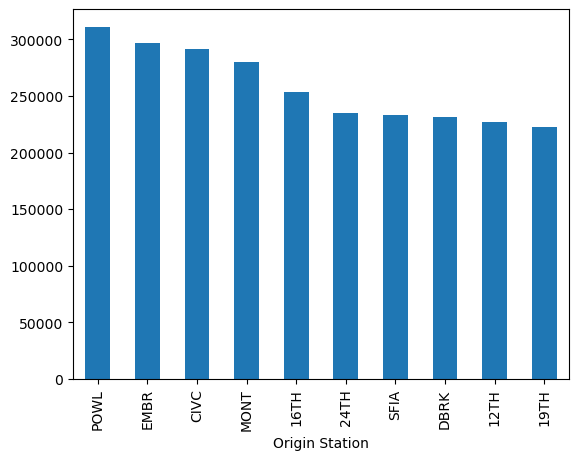

In [24]:
bart2022['Origin Station'].value_counts().plot.bar()
bart2022['Origin Station'].value_counts().head(10).plot.bar()

<Axes: xlabel='Destination Station'>

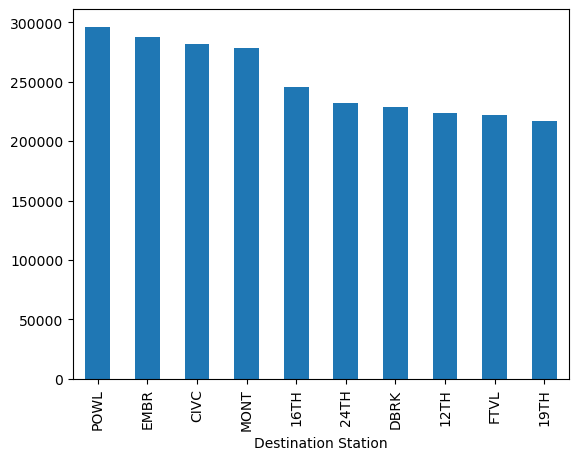

In [25]:
bart2022['Destination Station'].value_counts().plot.bar()
bart2022['Destination Station'].value_counts().head(10).plot.bar()

##### Import 2011 - 2023

In [6]:
test = list(range(2021,2024,1))

bart_summary = []
for i in test:
    df = pd.read_csv('date-hour-soo-dest-' + str(i) + '.csv')
#process within the loop
    bart = pd.concat([bart,df], axis = 0)
    bart_summary.append(#df)

pd.concat(bart_summary)
#summarize, concatenate and save the output as variable


In [46]:
bart2019 = pd.read_csv('date-hour-soo-dest-2019.csv')

In [47]:
bart2020 = pd.read_csv('date-hour-soo-dest-2020.csv')

In [48]:
bart2021 = pd.read_csv('date-hour-soo-dest-2021.csv')

In [49]:
bart2023 = pd.read_csv('date-hour-soo-dest-2023.csv')

In [51]:
bart19_23 = pd.concat([bart2019,bart2020,bart2021,bart2023], axis = 0)

In [57]:
bart19_23['Date'] = pd.to_datetime(bart19_23['Date'], format = '%Y-%m-%d')
bart19_23['Month'] = bart19_23['Date'].dt.month
bart19_23['Year'] = bart19_23['Date'].dt.year
bart19_23['Day'] = bart19_23['Date'].dt.dayofweek
bart19_23 = bart19_23.reset_index()
bart19_23

ValueError: cannot insert level_0, already exists

In [59]:
bart19_23['Year'] = bart19_23['Date'].dt.year
bart19_23

,level_0,index,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Day,Year
0,0,0,2019-01-01,0,12TH,12TH,3,1,1,2019
1,1,1,2019-01-01,0,12TH,16TH,4,1,1,2019
2,2,2,2019-01-01,0,12TH,ANTC,1,1,1,2019
3,3,3,2019-01-01,0,12TH,BAYF,1,1,1,2019
4,4,4,2019-01-01,0,12TH,CIVC,2,1,1,2019
...,...,...,...,...,...,...,...,...,...,...
25340189,25340189,2815977,2023-05-02,23,WOAK,PLZA,2,5,1,2023
25340190,25340190,2815978,2023-05-02,23,WOAK,POWL,3,5,1,2023
25340191,25340191,2815979,2023-05-02,23,WOAK,RICH,2,5,1,2023
25340192,25340192,2815980,2023-05-02,23,WOAK,SANL,1,5,1,2023


<Axes: xlabel='Year,Month'>

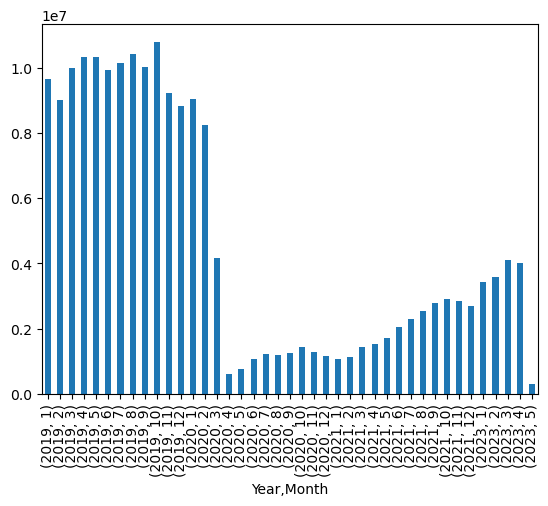

In [60]:
bart19_23.groupby(['Year','Month'])['Trip Count'].sum().plot.bar()

In [8]:
bart.isna().sum() # no missing data

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [9]:
print('Data is not missing values. First date in range: ' + str(bart['Date'].min()) + '. Last date in range: ' + str(bart['Date'].max()) + '. Total number of records: ' + str(bart.shape[0]))
print('There are ' + str(bart['Destination Station'].value_counts().shape[0]) + ' stations.')
print(str(bart[['Hour']].value_counts().shape[0]) + ' hours of origin represented, although not in every year.')

Data is not missing values. First date in range: 2011-01-01. Last date in range: 2023-05-02. Total number of records: 112536132
There are 50 stations.
24 hours of origin represented, although not in every year.


In [10]:
#Sample for Feature Engineering

random.seed(0)
sample = bart.sample(10)

In [146]:
print(sample['Date'].dtype)
sample[['Date']]
# sample['Date'].iloc[1]
sample


object


,Date,Hour,Origin Station,Destination Station,Trip Count
3917712,2016-05-23,7,PLZA,FRMT,8
6967591,2011-09-25,23,COLS,BALB,1
6105753,2013-08-20,7,19TH,BAYF,7
5408197,2012-07-21,19,WCRK,COLS,2
8911885,2019-11-16,16,ROCK,DALY,1
43261,2021-01-05,8,FRMT,BAYF,2
6435302,2018-08-19,17,SANL,MONT,10
827947,2020-02-02,0,BAYF,DUBL,1
8592327,2019-11-05,12,NBRK,SFIA,9
2102337,2018-03-19,16,MCAR,NCON,5


In [147]:
sample['Date'].astype

<bound method NDFrame.astype of 3917712    2016-05-23
6967591    2011-09-25
6105753    2013-08-20
5408197    2012-07-21
8911885    2019-11-16
43261      2021-01-05
6435302    2018-08-19
827947     2020-02-02
8592327    2019-11-05
2102337    2018-03-19
Name: Date, dtype: object>

In [12]:
#Converting to datetime and extracting days week month.

sample['Date'] = pd.to_datetime(sample['Date'], format = '%Y-%m-%d')
sample['Date'].dtype
sample['Month'] = sample['Date'].dt.month
sample['Year'] = sample['Date'].dt.year
sample['Day'] = sample['Date'].dt.dayofweek
sample = sample.reset_index()
sample


,level_0,index,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Year,Day
0,0,8695417,2018-11-06,6,PCTR,SFIA,2,11,2018,1
1,1,5138090,2013-07-15,9,MONT,DELN,10,7,2013,0
2,2,316182,2019-01-12,18,DELN,GLEN,1,1,2019,5
3,3,3721576,2017-05-18,19,DBRK,DALY,8,5,2017,3
4,4,7640532,2022-12-04,13,FRMT,BALB,1,12,2022,6
5,5,2207146,2019-03-22,6,COLS,DALY,3,3,2019,4
6,6,7216693,2013-09-29,10,UCTY,COLM,1,9,2013,6
7,7,1660711,2019-03-02,10,19TH,EMBR,38,3,2019,5
8,8,3561288,2021-08-08,21,MONT,RICH,4,8,2021,6
9,9,3756884,2018-05-18,6,CAST,DBRK,1,5,2018,4


In [ ]:
bart['Date'] = pd.to_datetime(bart['Date'], format = '%Y-%m-%d')
bart['Month'] = bart['Date'].dt.month
bart['Year'] = bart['Date'].dt.year
bart['Day'] = bart['Date'].dt.dayofweek
bart = bart.reset_index()
bart

In [167]:
#Basic Stats - Total trips per year, overall trend in ridership

sample.groupby('Year')['Trip Count'].sum().reset_index()
sample.groupby(['Year','Month'])['Trip Count'].sum().reset_index().sort_values(by='Month')


,Year,Month,Trip Count
8,2021,1,2
7,2020,2,1
4,2018,3,5
3,2016,5,8
1,2012,7,2
2,2013,8,7
5,2018,8,10
0,2011,9,1
6,2019,11,10


In [173]:
#busiest stations
sample_trips = sample.groupby(['Origin Station'])['Trip Count'].sum().reset_index().sort_values(by='Origin Station').merge(
sample.groupby(['Destination Station'])['Trip Count'].sum().reset_index().sort_values(by='Destination Station'),how = "outer", left_on = "Origin Station",
right_on = 'Destination Station')
sample_trips['Total_Trips'] = sample_trips['Trip Count_x'] = sample_trips['Trip Count_y']
sample_trips


,Origin Station,Trip Count_x,Destination Station,Trip Count_y,Total_Trips
0,19TH,NaN,NaN,NaN,NaN
1,NaN,1.0,BALB,1.0,1.0
2,BAYF,9.0,BAYF,9.0,9.0
3,COLS,2.0,COLS,2.0,2.0
4,NaN,1.0,DALY,1.0,1.0
5,NaN,1.0,DUBL,1.0,1.0
6,FRMT,8.0,FRMT,8.0,8.0
7,MCAR,NaN,NaN,NaN,NaN
8,NaN,10.0,MONT,10.0,10.0
9,NBRK,NaN,NaN,NaN,NaN


## Possible Questions:

1. Where should my client open their coffee chain? What are the highest traffic areas?
2. How where should I be increasing train cars and frequency of routes?
3. If we had to cut operating hours due to low ridership, which routes would we keep and when? 
4. Are there any good candidates for express trains? express services?
5. I want to place targeted ads in Bart -- which stations will give me the most exposure?

Over Time
1. What are the biggest trends in ridership? Any need to decrease routes?
2. What was the impact of Covid shelter in place on BART? How have we bounced back? 
3. Has ridership changed with the growth of with Uber and Lyft? What routes remain impervious?
4. If ridership has decreased over time, which statiosn are in need of revitalizing?

In [226]:
sample

,index,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Year,Day
0,3917712,2016-05-23,7,PLZA,FRMT,8,5,2016,0
1,6967591,2011-09-25,23,COLS,BALB,1,9,2011,6
2,6105753,2013-08-20,7,19TH,BAYF,7,8,2013,1
3,5408197,2012-07-21,19,WCRK,COLS,2,7,2012,5
4,8911885,2019-11-16,16,ROCK,DALY,1,11,2019,5
5,43261,2021-01-05,8,FRMT,BAYF,2,1,2021,1
6,6435302,2018-08-19,17,SANL,MONT,10,8,2018,6
7,827947,2020-02-02,0,BAYF,DUBL,1,2,2020,6
8,8592327,2019-11-05,12,NBRK,SFIA,9,11,2019,1
9,2102337,2018-03-19,16,MCAR,NCON,5,3,2018,0


In [235]:
sample

,index,Date,Hour,Origin Station,Destination Station,Trip Count,Month,Year,Day,Origin_SF,Destination_SF,Direction
0,3917712,2016-05-23,7,PLZA,FRMT,8,5,2016,0,0,0,0
1,6967591,2011-09-25,23,COLS,BALB,1,9,2011,6,0,1,-1
2,6105753,2013-08-20,7,19TH,BAYF,7,8,2013,1,0,0,0
3,5408197,2012-07-21,19,WCRK,COLS,2,7,2012,5,0,0,0
4,8911885,2019-11-16,16,ROCK,DALY,1,11,2019,5,0,1,-1
5,43261,2021-01-05,8,FRMT,BAYF,2,1,2021,1,0,0,0
6,6435302,2018-08-19,17,SANL,MONT,10,8,2018,6,0,1,-1
7,827947,2020-02-02,0,BAYF,DUBL,1,2,2020,6,0,0,0
8,8592327,2019-11-05,12,NBRK,SFIA,9,11,2019,1,0,1,-1
9,2102337,2018-03-19,16,MCAR,NCON,5,3,2018,0,0,0,0


## Deprecated

In [236]:
stations
pass

In [207]:
red = pd.DataFrame([[1, '16',0],[2,'24',0],[3,'GP',1],[4,'BP',0]], columns=['Stop', 'Station', 'Transfer'])
red

blue = pd.DataFrame([[1, 'AA',0],[2,'BB',0],[3,'GP',1],[4,'DD',0]], columns=['Stop', 'Station', 'Transfer'])
blue.reset_index()

,index,Stop,Station,Transfer
0,0,1,AA,0
1,1,2,BB,0
2,2,3,GP,1
3,3,4,DD,0


In [214]:
red_single = ['16','BP']
if (red_single[0] in list(red['Station'])) & (red_single[1] in list(red['Station'])):
    print(abs(red.loc[red['Station'] == red_single[0]].index.tolist()[0]-red.loc[red['Station'] == red_single[1]].index.tolist()[0]))

3


In [209]:
red

,Stop,Station,Transfer
0,1,16,0
1,2,24,0
2,3,GP,1
3,4,BP,0


In [212]:
abs(red.loc[red['Station'] == 'BP'].index.tolist()[0]-red.loc[red['Station'] == '24'].index.tolist()[0])


2

In [205]:
'BP' in list(red['Station'])

True